In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the csv file
df = pd.read_csv("bodyfat.csv")
# view data
print(df)
df.info()

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  

In [2]:
x=df.drop("BodyFat", axis=1)
y=df["BodyFat"]

In [3]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()
model=lm.fit(x,y)
model

LinearRegression()

In [4]:
lm.coef_#coefficient of the model

array([-4.11237849e+02,  1.25870031e-02,  1.00541597e-02, -7.98073928e-03,
       -2.84558253e-02,  2.67803354e-02,  1.85648834e-02,  1.91660401e-02,
       -1.67583631e-02, -4.63900522e-03, -8.56761181e-02, -5.50508219e-02,
        3.38634347e-02,  7.34493756e-03])

In [5]:
lm.intercept_#beta_0 / intercept

450.01256934457535

In [6]:
Predictions=lm.predict(x)#fitted values
print(Predictions[0:5])#print 1st 5 fitted values

[12.06855256  6.25369299 24.33152452 10.91650488 27.79919121]


In [7]:
lm.score(x,y)#r^2 value

0.9781070874885561

In [8]:
import statsmodels.api as sm
model=sm.OLS(endog=y, exog=sm.add_constant(x))
fitted=model.fit()
print(fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     756.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          8.50e-188
Time:                        04:49:20   Log-Likelihood:                -410.93
No. Observations:                 252   AIC:                             851.9
Df Residuals:                     237   BIC:                             904.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        450.0126     10.713     42.005      0.0

In [9]:
import seaborn as sns #plotting the correlation matrix
corr = x.corr()
print(corr)

          Density       Age    Weight    Height      Neck     Chest   Abdomen  \
Density  1.000000 -0.277637 -0.594062  0.097881 -0.472966 -0.682599 -0.798955   
Age     -0.277637  1.000000 -0.012746 -0.171645  0.113505  0.176450  0.230409   
Weight  -0.594062 -0.012746  1.000000  0.308279  0.830716  0.894191  0.887995   
Height   0.097881 -0.171645  0.308279  1.000000  0.253710  0.134892  0.087813   
Neck    -0.472966  0.113505  0.830716  0.253710  1.000000  0.784835  0.754077   
Chest   -0.682599  0.176450  0.894191  0.134892  0.784835  1.000000  0.915828   
Abdomen -0.798955  0.230409  0.887995  0.087813  0.754077  0.915828  1.000000   
Hip     -0.609331 -0.050332  0.940884  0.170394  0.734958  0.829420  0.874066   
Thigh   -0.553091 -0.200096  0.868694  0.148436  0.695697  0.729859  0.766624   
Knee    -0.495040  0.017516  0.853167  0.286053  0.672405  0.719496  0.737179   
Ankle   -0.264890 -0.105058  0.613685  0.264744  0.477892  0.482988  0.453223   
Biceps  -0.487109 -0.041162 

<AxesSubplot:>

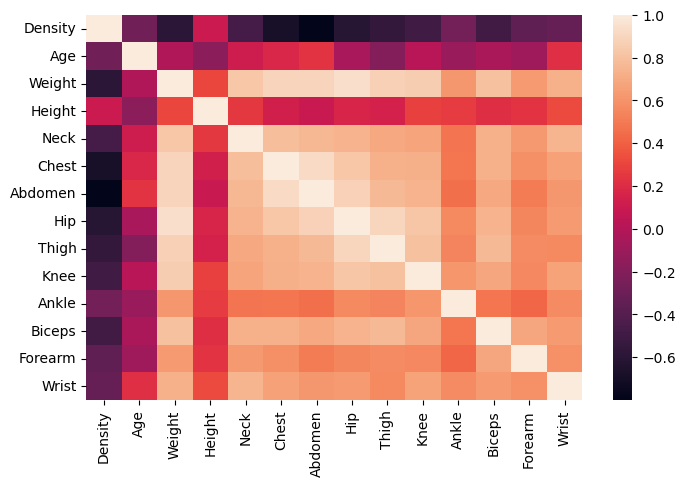

In [10]:
plt.figure(figsize=(8,5))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values )


<AxesSubplot:xlabel='Age', ylabel='Weight'>

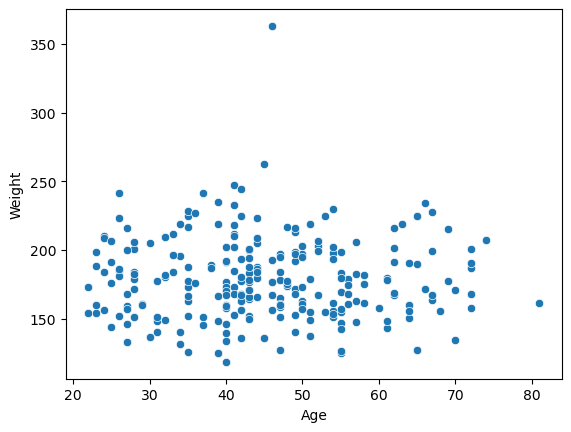

In [11]:
# Create scatterplot
sns.scatterplot(x="Age", y="Weight", data=df)

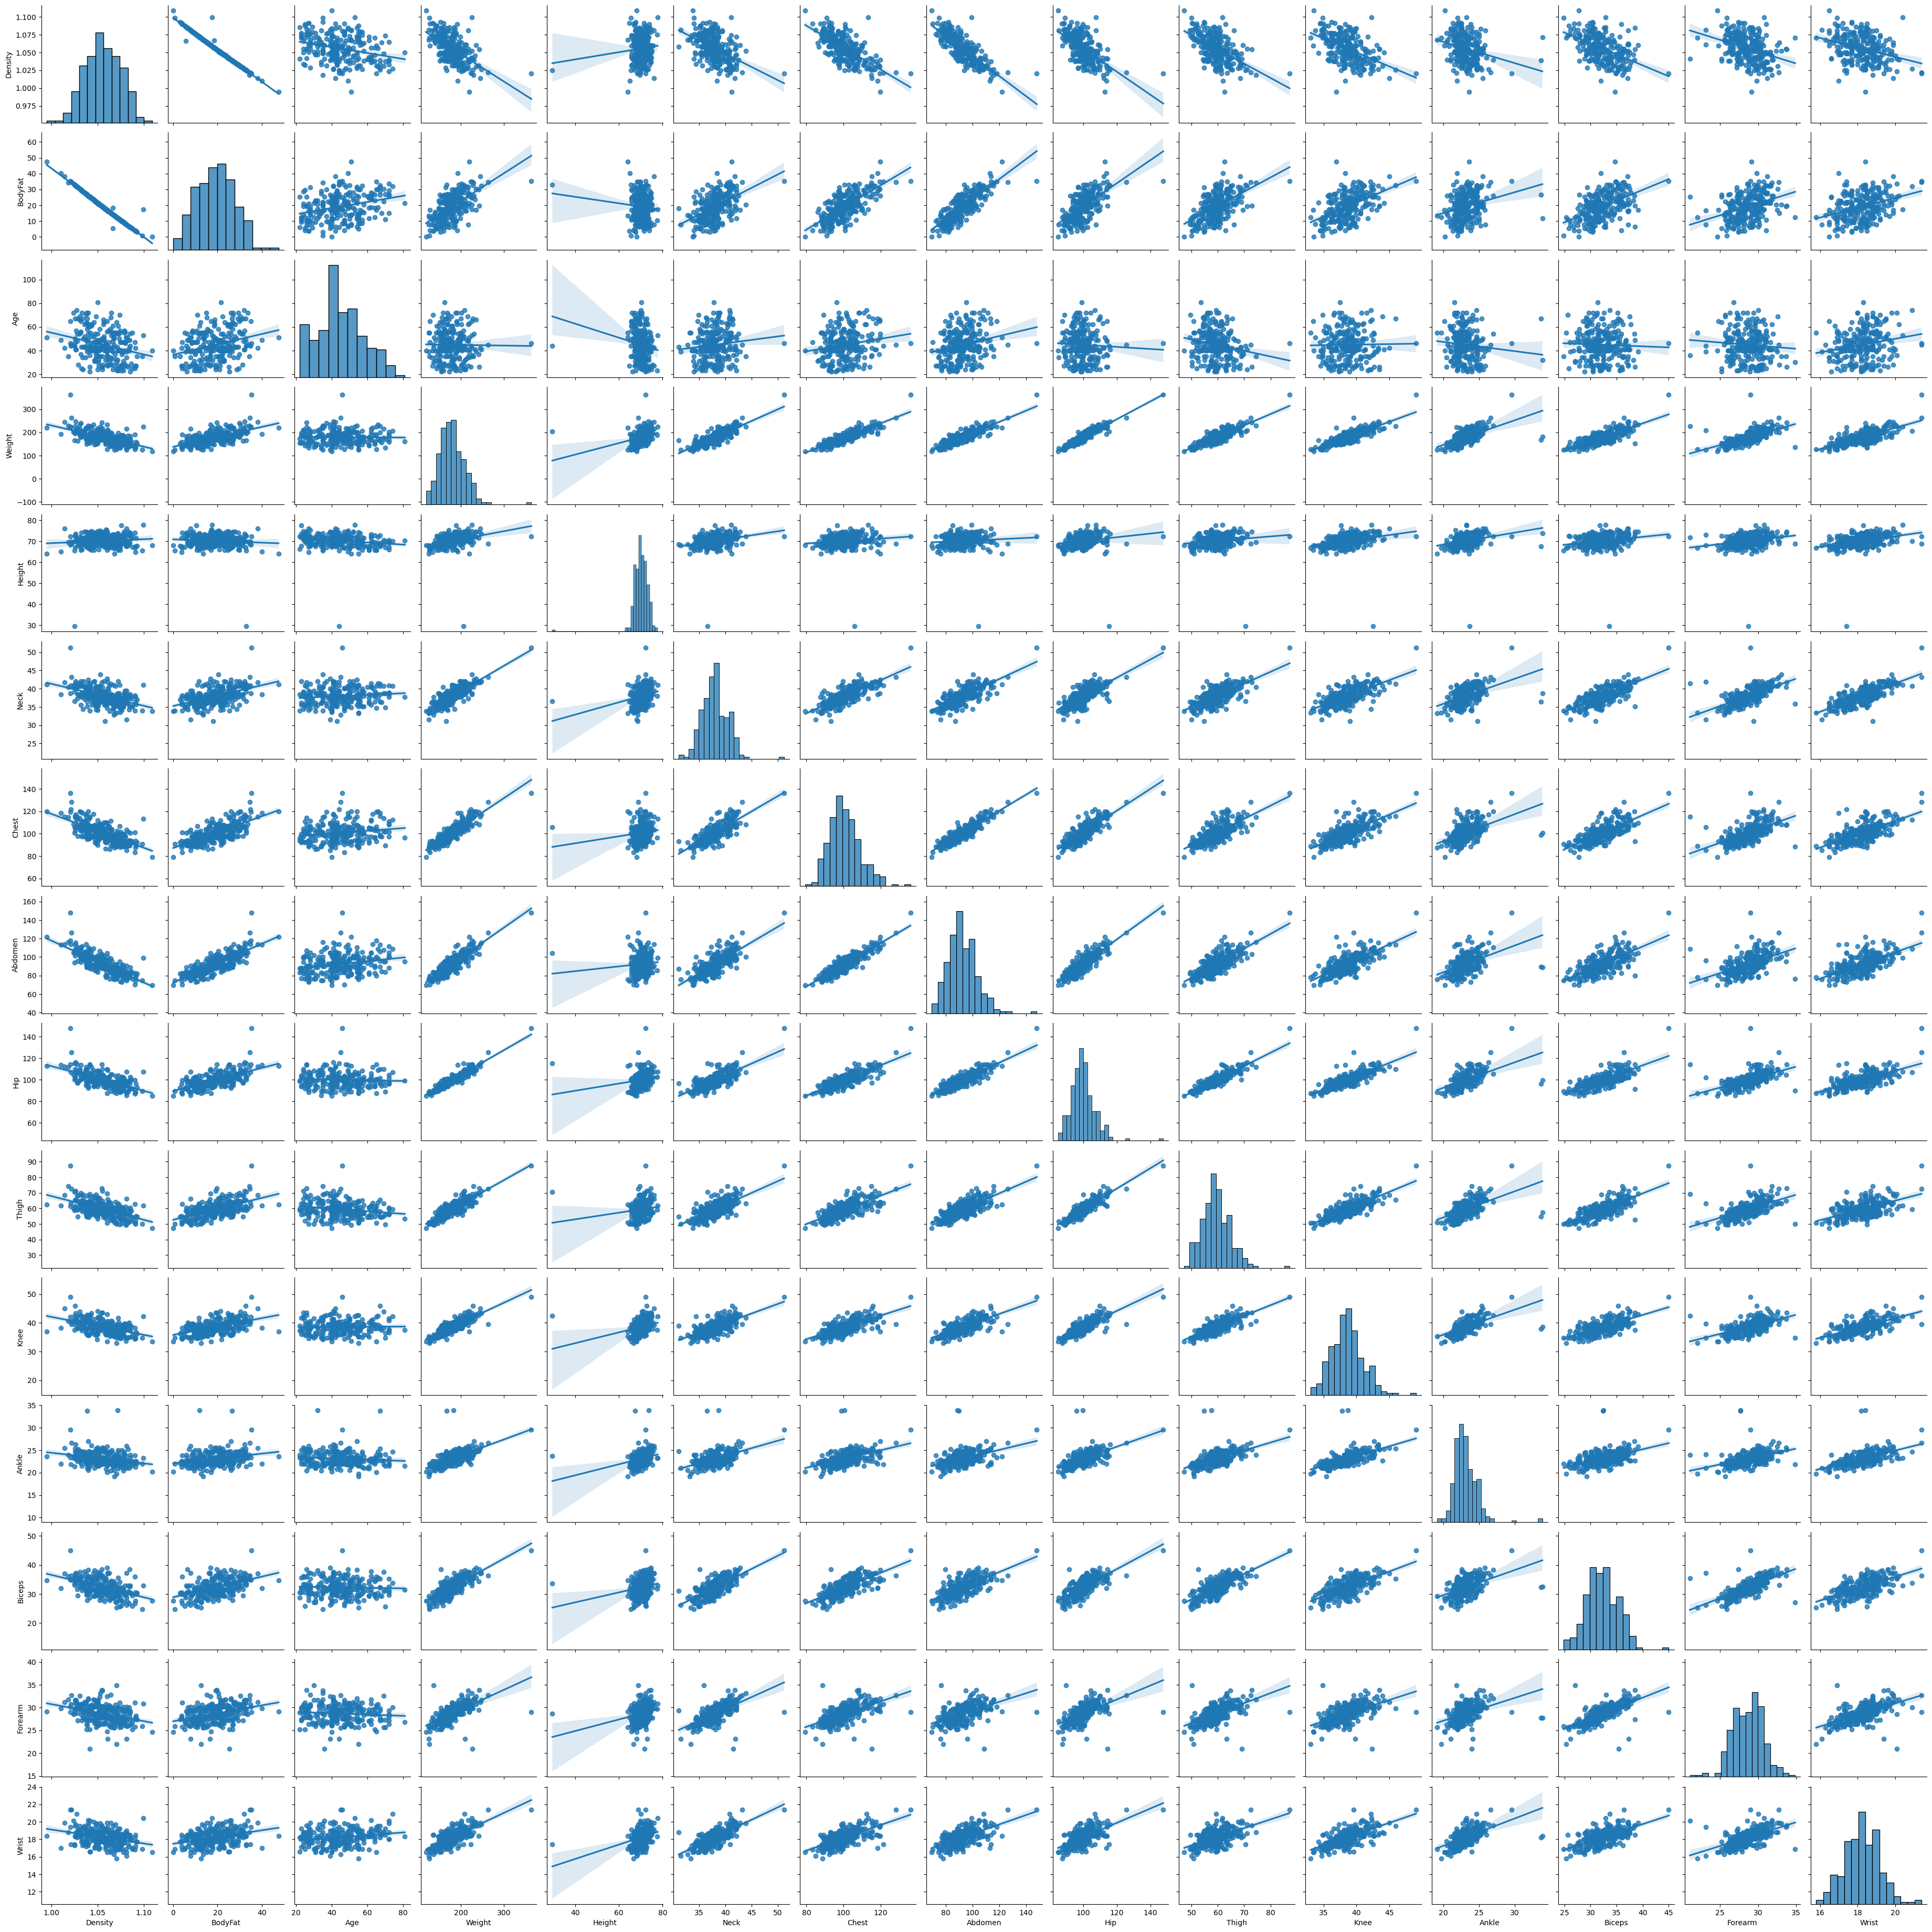

In [12]:
# Create the pairplot with a trendline
sns.pairplot(data=df,kind="reg")

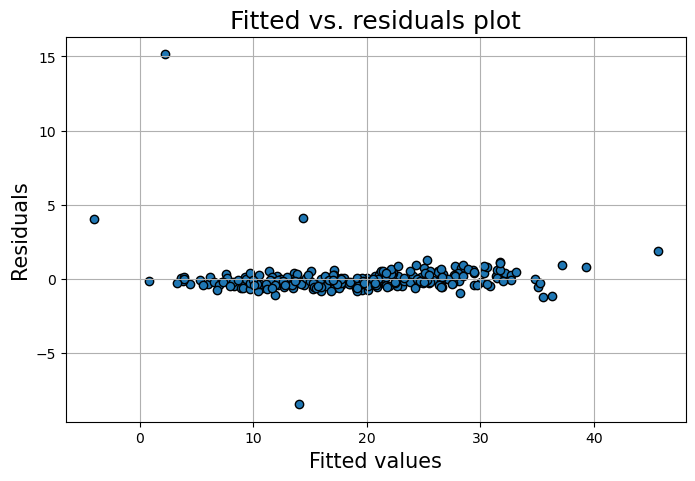

In [13]:
plt.figure(figsize=(8,5)) # plot residuals vs fitted values
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()


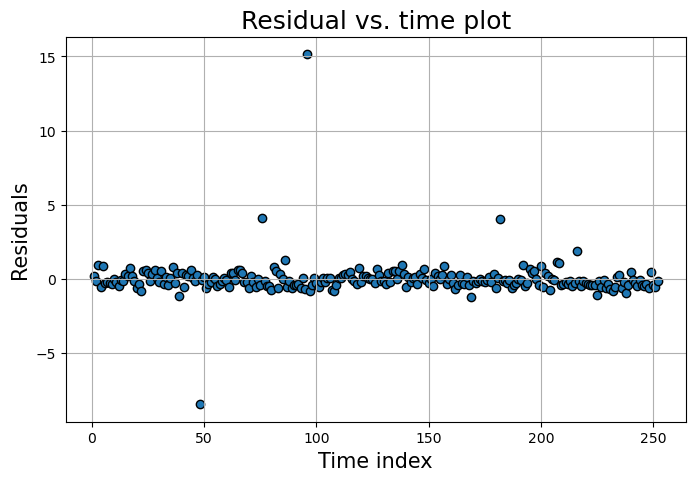

In [20]:
#correlation or error terms 
plt.figure(figsize=(8,5))
p=plt.scatter(x=np.arange(1,253,1),y=fitted.resid,edgecolor='k')
plt.xlabel("Time index",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Residual vs. time plot",fontsize=18)
plt.grid(True)
plt.show()


<Figure size 800x500 with 0 Axes>

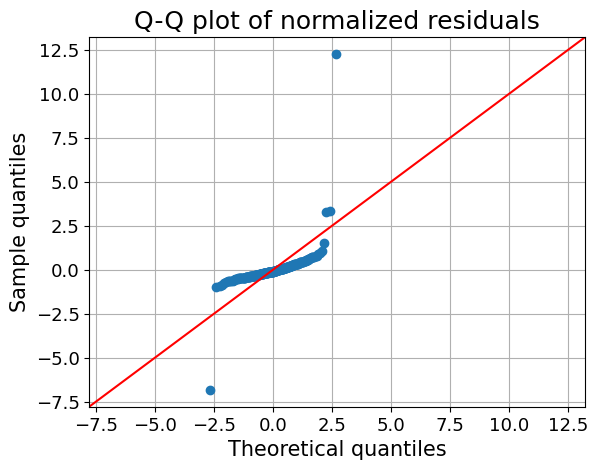

In [15]:
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(8,5))
fig=qqplot(fitted.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()


C:\Users\Fathir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

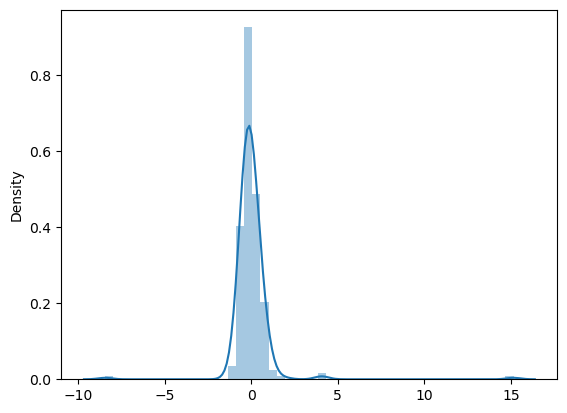

In [16]:
sns.distplot(fitted.resid)